In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import time
import sys
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import decomposition
from sklearn.cluster import KMeans

In [2]:
ht = pd.read_csv('heart.csv')
ht.head()
ht.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


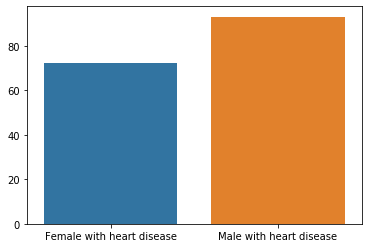

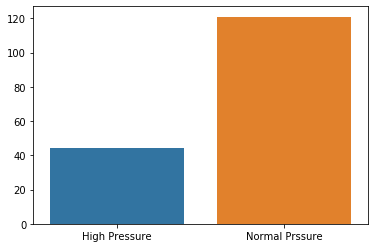

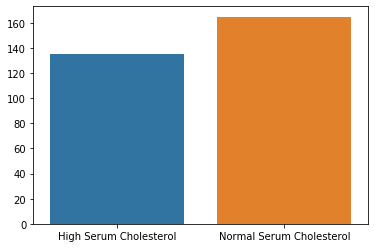

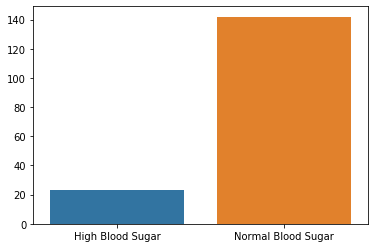

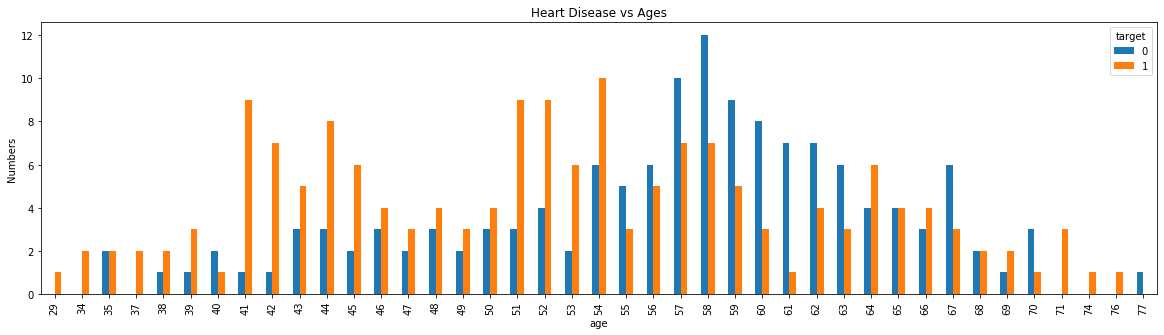

In [3]:


NumFemale1=len(ht[(ht.sex==0)&(ht['target']==1)])
NumMale1=len(ht[(ht.sex==1)&(ht['target']==1)])
sns.barplot(x=['Female with heart disease','Male with heart disease'],y=[NumFemale1,NumMale1])
plt.show()

NumHighPressure=len(ht[(ht['trestbps']>=140)&(ht['target']==1)])
NumNormalPressure=len(ht[(ht['trestbps']<140)&(ht['target']==1)])
sns.barplot(x=['High Pressure','Normal Prssure'],y=[NumHighPressure,NumNormalPressure])
plt.show()

HighSerumCholesterol=len(ht[(ht['chol']>=200)&(ht['target']==1)])
NormalSerumCholesterol=len(ht[(ht['trestbps']<200)&(ht['target']==1)])
sns.barplot(x=['High Serum Cholesterol','Normal Serum Cholesterol'],y=[HighSerumCholesterol,NormalSerumCholesterol])
plt.show()

HighBloodSugar=len(ht[(ht['fbs']==1)&(ht['target']==1)])
NormalBloodSugar=len(ht[(ht['fbs']==0)&(ht['target']==1)])
sns.barplot(x=['High Blood Sugar','Normal Blood Sugar'],y=[HighBloodSugar,NormalBloodSugar])
plt.show()

pd.crosstab(ht.age,ht.target).plot(kind="bar",figsize=(20,5))
plt.title('Heart Disease vs Ages')
plt.xlabel('age')
plt.ylabel('Numbers')
plt.show()


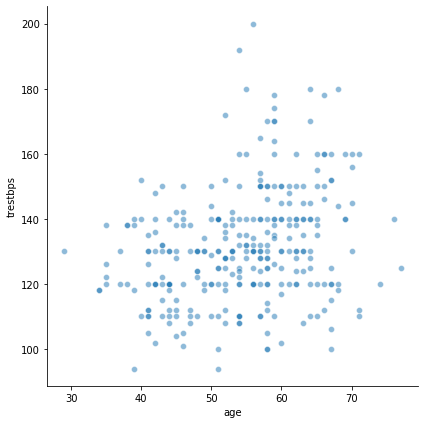

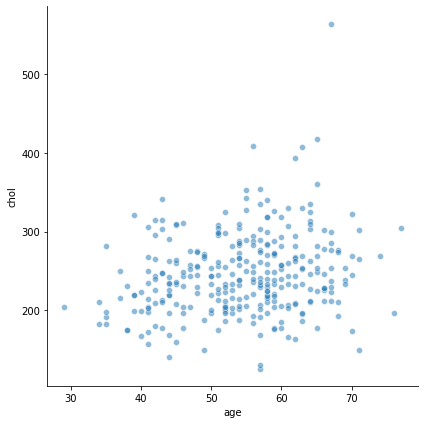

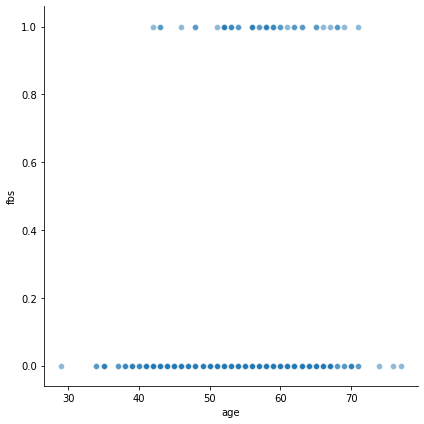

In [4]:
sns.relplot(x='age', y='trestbps',sizes=(40, 100), alpha=.5, palette='muted',height=6, data=ht)
sns.relplot(x='age', y='chol',sizes=(40, 100), alpha=.5, palette='muted',height=6, data=ht)
sns.relplot(x='age', y='fbs',sizes=(40, 100), alpha=.5, palette='muted',height=6, data=ht)


In [5]:
features = ht[['age','sex','trestbps','chol','fbs','thalach','exang','ca','cp']]
features = pd.get_dummies(features, columns=['sex','fbs','exang','ca','cp'])
label = ht[['target']]
features.head()
#Spliting the dataset based on 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [6]:
features.head()

,age,trestbps,chol,thalach,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4,cp_0,cp_1,cp_2,cp_3
0,63,145,233,150,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1
1,37,130,250,187,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
3,56,120,236,178,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0


In [7]:
# Implement Logistic Regression model
#Training phase
start1a = time.time()
logistic_regression_model = SGDClassifier(loss = 'log', max_iter  =10000, tol = 0.0001, random_state = 34)
logistic_regression_model.fit(x_train,y_train)
stop1a = time.time()
train_time1 = stop1a - start1a
#Predicting phase
start1b = time.time()
y_pred3 = logistic_regression_model.predict(x_test)
stop1b = time.time()
pred_time1 = stop1b - start1b
print(f"The accuracy score of Logistic Regression Model: {accuracy_score(y_test,y_pred3)}")

The accuracy score of Logistic Regression Model: 0.5081967213114754


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


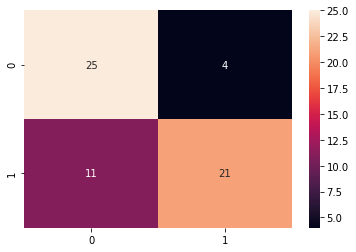

Sensitivity for Decision Tree Model:  0.6944444444444444
Specificity for Decision Tree Model:  0.84


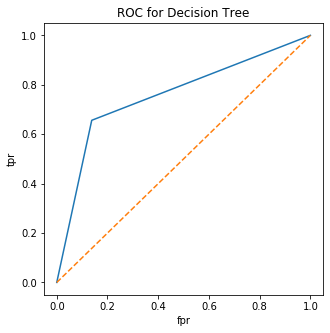

AUC :  0.7591594827586207


In [8]:
# Implement Decision Tree Classifier
#Training phase
start2a = time.time()
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
stop2a = time.time()
train_time2 = stop2a - start2a
#Predicting phase
start2b = time.time()
y_pred0 = model.predict(x_test)
stop2b = time.time()
pred_time2 = stop2b - start2b
y_pred_quant = model.predict_proba(x_test)[:, 1]
confusion_matrix0 = confusion_matrix(y_test.values, y_pred0)
sns.heatmap(confusion_matrix0,annot=True)
plt.show()
sensitivity = confusion_matrix0[0,0]/(confusion_matrix0[0,0]+confusion_matrix0[1,0])
print('Sensitivity for Decision Tree Model: ', sensitivity )
specificity = confusion_matrix0[1,1]/(confusion_matrix0[1,1]+confusion_matrix0[0,1])
print('Specificity for Decision Tree Model: ', specificity)
fpr, tpr, thresholds = roc_curve(y_test, y_pred0)
plt.figure(figsize=(5,5))
plt.title('ROC for Decision Tree')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()
print('AUC : ', auc(fpr, tpr) )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.11951686 0.09860389 0.10112755 0.14165855 0.03443917 0.03590352
 0.01015097 0.00950823 0.05616331 0.0625085  0.12692382 0.02661412
 0.01900424 0.00921792 0.0038358  0.08590515 0.01702603 0.029823
 0.01206938]


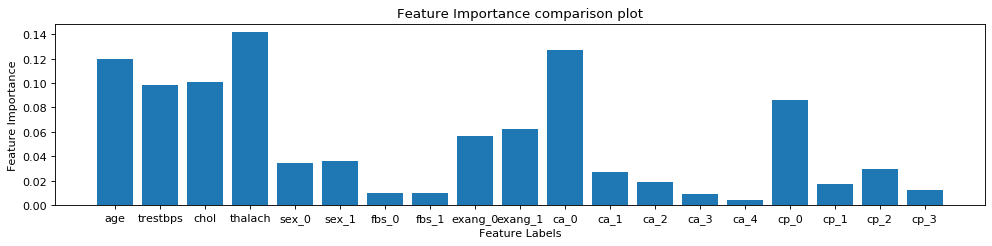

In [9]:
# Implement Random Forest and feature importances
#Training phase
start3a = time.time()
Forest_model = RandomForestClassifier()
Forest_model.fit(x_train,y_train)
stop3a = time.time()
train_time3 = stop3a - start3a
print(Forest_model.feature_importances_)
plt.figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x_train.columns,Forest_model.feature_importances_)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Feature Importance comparison plot')
plt.show()

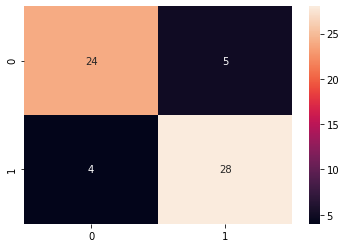

Sensitivity :  0.8571428571428571
Specificity :  0.8484848484848485


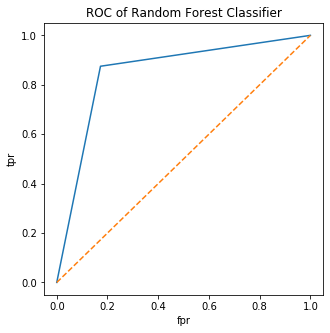

AUC(Accuracy Score) :  0.8512931034482758


In [10]:
#Predicting phase
start3b = time.time()
y_pred1 = Forest_model.predict(x_test)
stop3b = time.time()
pred_time3 = stop3b - start3b
confusion_matrix1 = confusion_matrix(y_test.values, y_pred1)
sns.heatmap(confusion_matrix1,annot=True)
plt.show()
sensitivity1 = confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[1,0])
print('Sensitivity : ', sensitivity1 )
specificity1 = confusion_matrix1[1,1]/(confusion_matrix1[1,1]+confusion_matrix1[0,1])
print('Specificity : ', specificity1)
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(5,5))
plt.title('ROC of Random Forest Classifier')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()
print('AUC(Accuracy Score) : ', auc(fpr1, tpr1) )

In [11]:
# Implement Extra Tree Classifier
#Training phase
start4a = time.time()
Extra_model = ExtraTreesClassifier()
Extra_model.fit(x_train,y_train)
stop4a = time.time()
train_time4 = stop4a - start4a

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


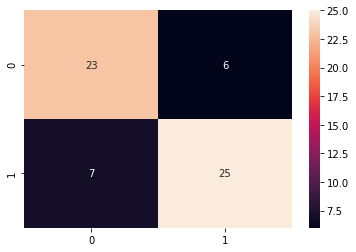

Sensitivity :  0.7666666666666667
Specificity :  0.8064516129032258


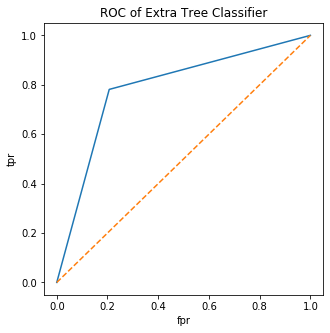

AUC(Accuracy Score) :  0.787176724137931


In [12]:
#Predicting phase
start4b = time.time()
y_pred2 = Extra_model.predict(x_test)
stop4b = time.time()
pred_time4 = stop4b - start4b
confusion_matrix2 = confusion_matrix(y_test.values, y_pred2)
sns.heatmap(confusion_matrix2,annot=True)
plt.show()
sensitivity2 = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity2 )
specificity2 = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity2)
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)
plt.figure(figsize=(5,5))
plt.title('ROC of Extra Tree Classifier')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()
print('AUC(Accuracy Score) : ', auc(fpr2, tpr2) )

In [15]:
#Time showing
print("Training time used: ")
print(f"Logistic Regression: {train_time1}s")
print(f"Decision Tree Classifier: {train_time2}s")
print(f"Random Forest: {train_time3}s")
print(f"Extra Tree Classifier: {train_time4}s")
print("Predicting time used: ")
print(f"Logistic Regression: {pred_time1}s")
print(f"Decision Tree Classifier: {pred_time2}s")
print(f"Random Forest: {pred_time3}s")
print(f"Extra Tree Classifier: {pred_time4}s")


Training time used: 
Logistic Regression: 0.01636815071105957s
Decision Tree Classifier: 0.01733708381652832s
Random Forest: 0.213029146194458s
Extra Tree Classifier: 0.15997314453125s
Predicting time used: 
Logistic Regression: 0.0012700557708740234s
Decision Tree Classifier: 0.002718210220336914s
Random Forest: 0.02731609344482422s
Extra Tree Classifier: 0.03433966636657715s


In [16]:
print("MSE of different models")
print(f"Logistic Regression: {mean_squared_error(y_test, y_pred3)}")
print(f"Decision Tree Classifier: {mean_squared_error(y_test, y_pred0)}")
print(f"Random Forest: {mean_squared_error(y_test, y_pred1)}")
print(f"ExtraTree Classifier: {mean_squared_error(y_test, y_pred2)}")

MSE of different models
Logistic Regression: 15.885245901639344
Decision Tree Classifier: 0.2459016393442623
Random Forest: 0.14754098360655737
ExtraTree Classifier: 0.21311475409836064


In [17]:
ht.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
